In [1]:
# Cargar las librerías necesarias

# Manejo y análisis de datos
import pandas as pd  # Estructuras de datos
import numpy as np  # Cálculo numérico y análisis

# Visualización
import seaborn as sns  # Gráficos estadísticos
import matplotlib.pyplot as plt  # Gráficos en 2D

# Librerías de Machine Learning
from sklearn import metrics  # Métricas de evaluación
from sklearn.model_selection import train_test_split  # División de datos en train y test
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística
from sklearn.metrics import classification_report, confusion_matrix  # Reporte y matriz de confusión


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None 

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2

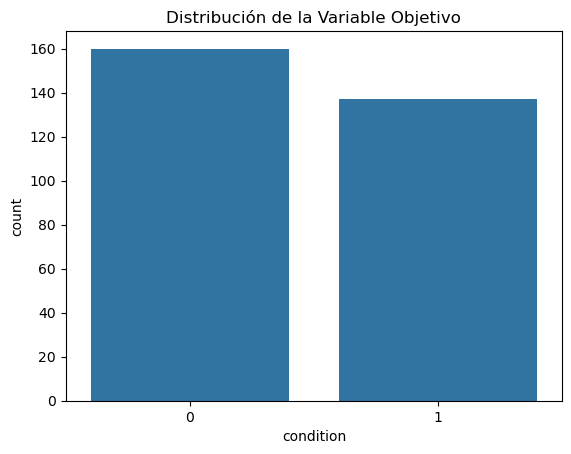

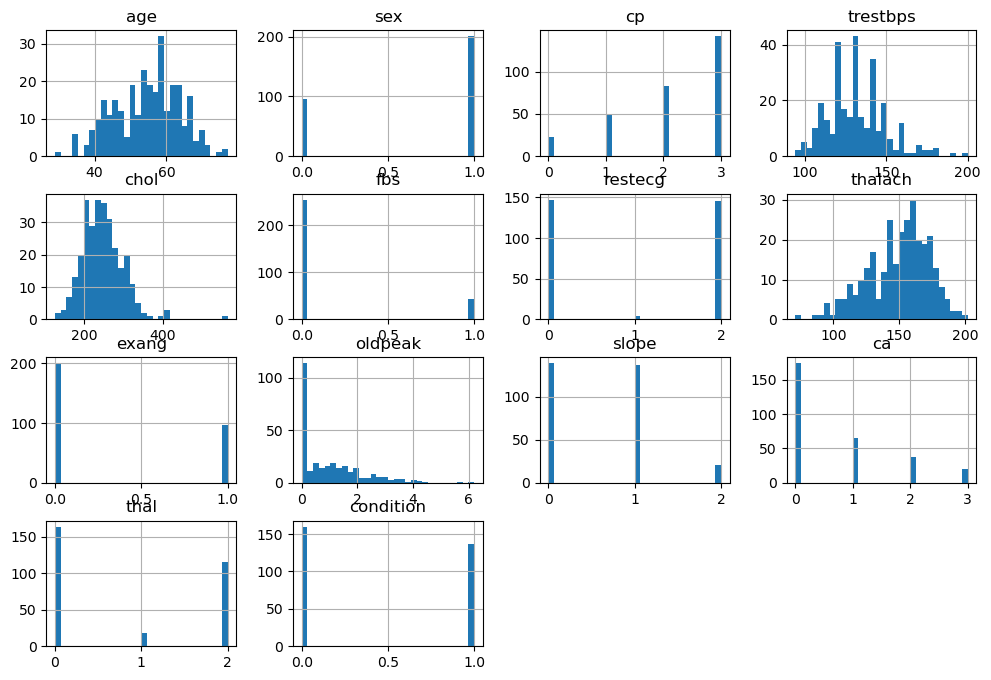

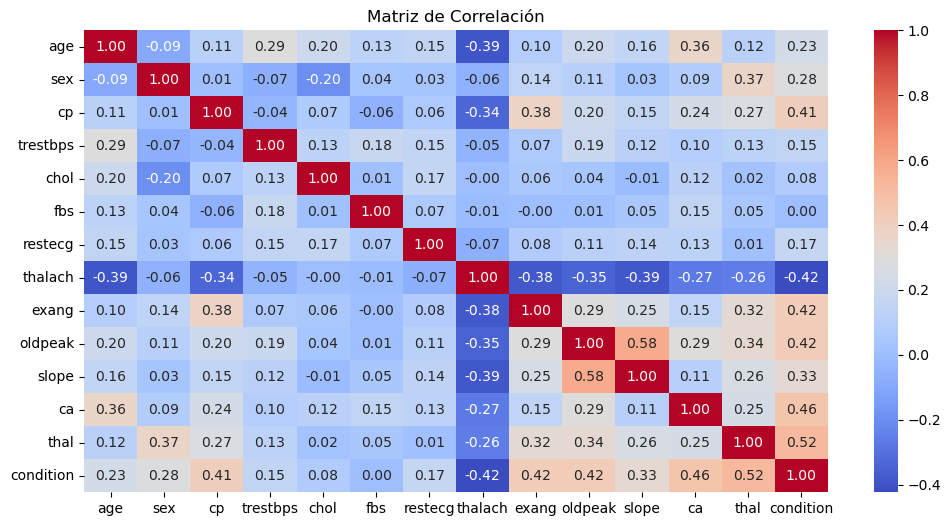

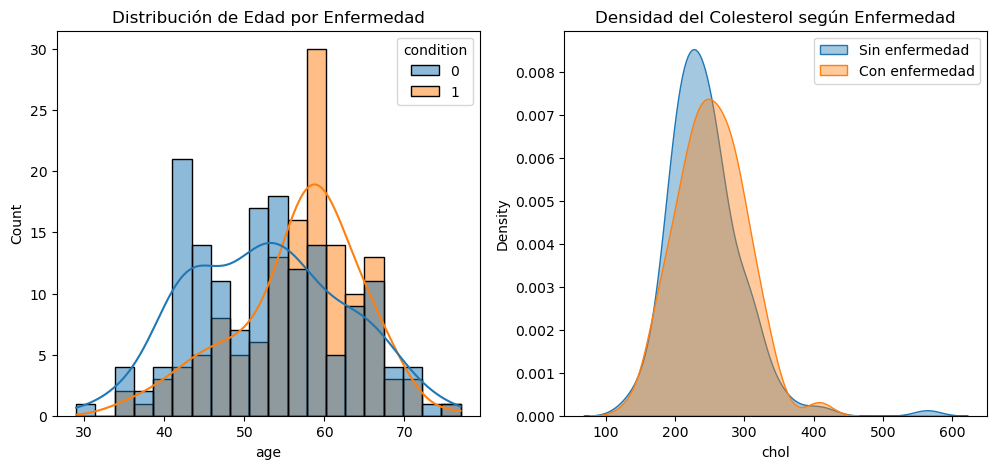


Valores atípicos en chol: Menos de 113.5 o más de 373.5


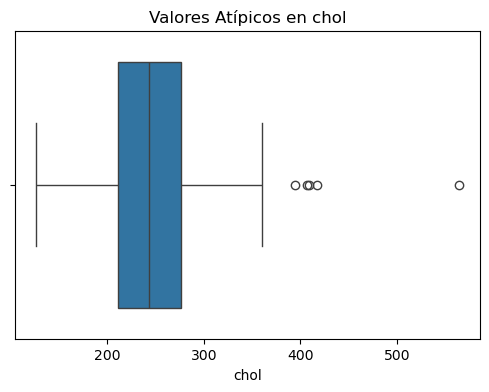


Valores atípicos en trestbps: Menos de 90.0 o más de 170.0


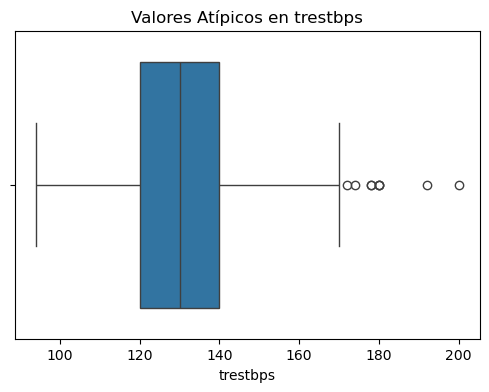

Valores únicos en ca: [1 2 0 3]
Valores únicos en thal: [0 2 1]


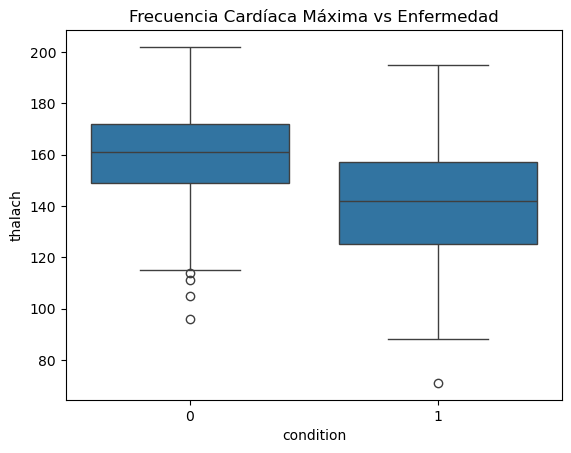

In [254]:
#1

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  

# Cargar datos
Datos = pd.read_csv('C:/UNAD/heart_cleveland_upload.csv')

# Resumen general
print(Datos.info(), "\n")
print(Datos.describe(), "\n")
print(f"Duplicados: {Datos.duplicated().sum()}")
print("\nValores nulos por columna:\n", Datos.isnull().sum())

#Distribución de la variable objetivo
sns.countplot(x="condition", data=Datos)
plt.title("Distribución de la Variable Objetivo")
plt.show()

#Histograma de variables numéricas
Datos.hist(figsize=(12,8), bins=30)
plt.show()

#Matriz de Correlación
plt.figure(figsize=(12,6))
sns.heatmap(Datos.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#Relación de variables con la enfermedad
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=Datos, x="age", hue="condition", kde=True, bins=20, ax=axes[0])
axes[0].set_title("Distribución de Edad por Enfermedad")

sns.kdeplot(Datos[Datos["condition"]==0]["chol"], label="Sin enfermedad", fill=True, alpha=0.4, ax=axes[1])
sns.kdeplot(Datos[Datos["condition"]==1]["chol"], label="Con enfermedad", fill=True, alpha=0.4, ax=axes[1])
axes[1].set_title("Densidad del Colesterol según Enfermedad")
axes[1].legend()

plt.show()

#  Detección y visualización de outliers
for col in ["chol", "trestbps"]:
    Q1, Q3 = Datos[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    limites = [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
    print(f"\nValores atípicos en {col}: Menos de {limites[0]} o más de {limites[1]}")

    # Gráfico de Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=Datos[col])
    plt.title(f"Valores Atípicos en {col}")
    plt.show()

#Valores únicos en variables categóricas
for col in ["ca", "thal"]:
    print(f"Valores únicos en {col}: {Datos[col].unique()}")

# Frecuencia cardíaca máxima vs enfermedad
sns.boxplot(x="condition", y="thalach", data=Datos)
plt.title("Frecuencia Cardíaca Máxima vs Enfermedad")
plt.show()



Registros con valor 0 en columnas clave:
trestbps     0
chol         0
thalach      0
oldpeak     96
dtype: int64


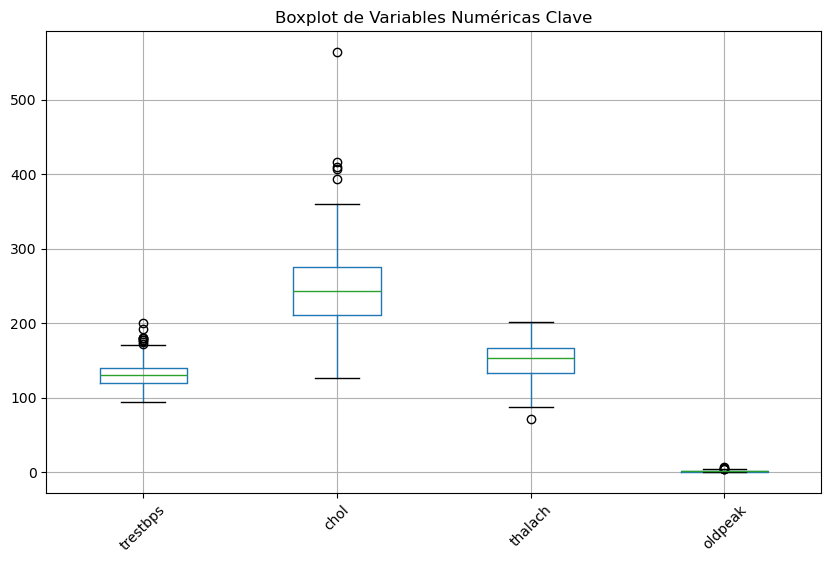


Valores nulos antes del tratamiento:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Valores nulos después del tratamiento:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thal

In [256]:
#2
# Identificar valores atípicos (ceros donde no deberían estar)
columnas_cero = ['trestbps', 'chol', 'thalach', 'oldpeak']
print("\nRegistros con valor 0 en columnas clave:")
print(Datos[columnas_cero].isin([0]).sum())

# Visualización de outliers
plt.figure(figsize=(10, 6))
Datos[columnas_cero].boxplot()
plt.title("Boxplot de Variables Numéricas Clave")
plt.xticks(rotation=45)
plt.show()

# Manejo de valores faltantes con la mediana
print("\nValores nulos antes del tratamiento:\n", Datos.isnull().sum())
Datos.fillna(Datos.median(), inplace=True)
print("\nValores nulos después del tratamiento:\n", Datos.isnull().sum())

# Verificar la estructura final de los datos
Datos.info()




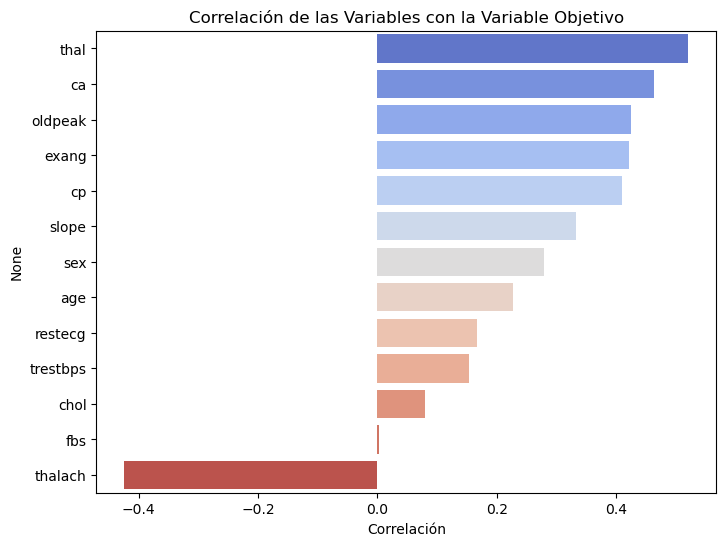

Características SelectKBest: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Características RFE: ['sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
Características comunes: {'thalach', 'cp', 'sex', 'thal', 'exang', 'oldpeak', 'ca'}


In [250]:
#3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression

# Filtrar solo la correlación de las variables con la variable objetivo
plt.figure(figsize=(8, 6))
correlation = Datos.corr()["condition"].drop("condition").sort_values(ascending=False)

# Corregimos la advertencia agregando hue=correlation.index y legend=False
sns.barplot(x=correlation.values, y=correlation.index, hue=correlation.index, palette="coolwarm", legend=False)

plt.title("Correlación de las Variables con la Variable Objetivo")
plt.xlabel("Correlación")
plt.show()

# Preprocesamiento y Selección de CaracterísticaS
X = Datos.drop(columns=["condition"])  
y = Datos["condition"]  

# Normalización
X_scaled = StandardScaler().fit_transform(X)

# Método 1: SelectKBest (ANOVA)
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]

# Método 2: RFE con Regresión Logística
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=8)
X_rfe = rfe.fit_transform(X_scaled, y)
selected_features_rfe = X.columns[rfe.support_]

# Comparación de características seleccionadas
print(f"Características SelectKBest: {list(selected_features)}")
print(f"Características RFE: {list(selected_features_rfe)}")
print(f"Características comunes: {set(selected_features) & set(selected_features_rfe)}")


In [308]:
#4
from sklearn.model_selection import train_test_split

# Definir variables predictoras y objetivo
X = Datos[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "slope", "ca"]]  # Características seleccionadas
y = Datos["condition"]  # Variable objetivo

# División en Train (80%) y Test (20%) con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Mostrar tamaños de los conjuntos
print(f"Tamaño Train: {X_train.shape}, Tamaño Test: {X_test.shape}")



Tamaño Train: (237, 8), Tamaño Test: (60, 8)


In [284]:
#5
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")  # Solver adecuado para conjuntos de datos pequeños
modelo_regresion.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Crear el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)  # Predecir sobre los datos de prueba

# Mostrar los primeros 10 valores de predicción
print("Predicciones del modelo:")
print(Prediccion[:50])

# Visualizar las primeras 10 filas del conjunto de prueba
X_test.head(10)


Predicciones del modelo:
[0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 0]


,age,cp,trestbps,chol,thalach,oldpeak,slope,ca
295,35,3,138,183,182,1.4,0,0
215,58,3,100,248,122,1.0,1,0
66,41,1,110,235,153,0.0,0,0
77,68,2,120,211,115,1.5,1,0
53,48,1,130,245,180,0.2,1,0
249,54,3,140,239,160,1.2,0,0
28,62,1,120,281,103,1.4,1,1
188,62,3,140,394,157,1.2,1,0
126,50,2,140,233,163,0.6,1,1
141,44,2,120,226,169,0.0,0,0


In [290]:
#6
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluación del modelo en el conjunto de prueba
print("Matriz de Confusión:")
print(confusion_matrix(y_test, Prediccion))

print("\nReporte de Clasificación:")
print(classification_report(y_test, Prediccion))

# Exactitud del modelo
accuracy = accuracy_score(y_test, Prediccion)
print(f"\nExactitud del modelo: {accuracy:.4f}")


Matriz de Confusión:
[[27  5]
 [ 9 19]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.79      0.68      0.73        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60


Exactitud del modelo: 0.7667


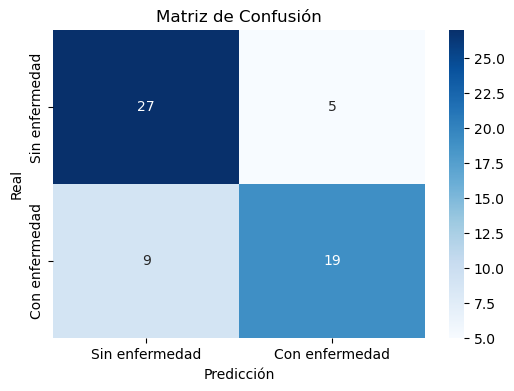

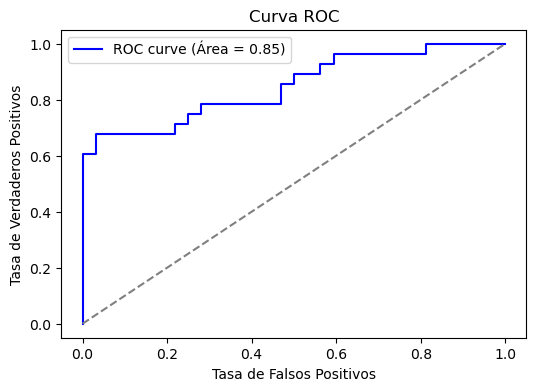

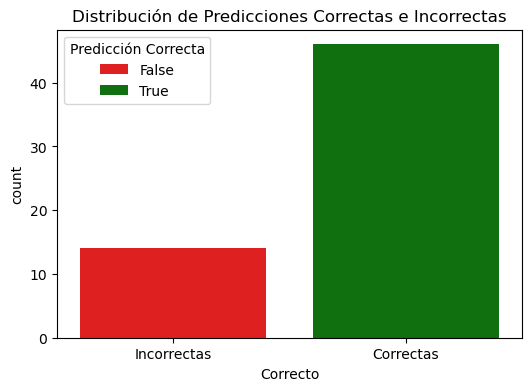

In [302]:
#7
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, Prediccion)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sin enfermedad", "Con enfermedad"], yticklabels=["Sin enfermedad", "Con enfermedad"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


from sklearn.metrics import roc_curve, auc

# Probabilidades del modelo
y_prob = modelo_regresion.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (Área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()


import pandas as pd

# Crear un DataFrame con valores reales y predichos
df_resultados = pd.DataFrame({"Real": y_test, "Predicción": Prediccion})
df_resultados["Correcto"] = df_resultados["Real"] == df_resultados["Predicción"]

# Conteo de predicciones correctas e incorrectas con corrección en 'palette'
plt.figure(figsize=(6,4))
sns.countplot(x="Correcto", data=df_resultados, hue="Correcto", palette={True: "green", False: "red"})
plt.xticks([0,1], ["Incorrectas", "Correctas"])
plt.title("Distribución de Predicciones Correctas e Incorrectas")
plt.legend(title="Predicción Correcta")
plt.show()

